In [93]:
import pandas as pd
pd.read_csv("../data/Teams.csv")

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.830,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.820,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.810,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.800,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.830,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0,101,98,LAD,LAN,LAN
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0,99,97,SFG,SFN,SFN
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,138.0,0.985,San Diego Padres,Petco Park,2459742.0,98,97,SDP,SDN,SDN


In [94]:
Tdf = pd.read_csv("../data/Teams.csv", encoding= 'utf-8')
Tdf.tail(2)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,138.0,0.985,San Diego Padres,Petco Park,2459742.0,98,97,SDP,SDN,SDN
2804,2015,NL,COL,COL,W,5,162,81.0,68,94,...,171.0,0.985,Colorado Rockies,Coors Field,2506789.0,119,118,COL,COL,COL


In [95]:
### Dropping the columns I am uninterested in

In [96]:
Tdf = Tdf.drop(['lgID','franchID', 'divID', 'Rank', 'DivWin','WCWin','AB','2B','3B','HR','CS','HBP','SO'
             ,'SF','RA','attendance','CG','SHO','SV','IPouts','HA','HRA','SOA','DP','FP','name','park', 'BBA'
              , 'BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','BB', 'Ghome'], axis = 1)
Tdf.tail(2)

,yearID,teamID,G,W,L,LgWin,WSWin,R,H,SB,ER,ERA,E
2803,2015,SDN,162,74,88,N,N,650,1324,82.0,655,4.09,92
2804,2015,COL,162,68,94,N,N,737,1479,97.0,799,5.04,95


In [97]:
### Getting rid of any rows with "NaN" values. 

In [98]:
Tdf = Tdf.dropna(axis = 'rows');
print(Tdf[Tdf.isna().any(axis=1)])

Empty DataFrame
Columns: [yearID, teamID, G, W, L, LgWin, WSWin, R, H, SB, ER, ERA, E]
Index: []


In [99]:
Tdf.tail(3)

,yearID,teamID,G,W,L,LgWin,WSWin,R,H,SB,ER,ERA,E
2802,2015,ARI,162,79,83,N,N,720,1494,132.0,659,4.04,86
2803,2015,SDN,162,74,88,N,N,650,1324,82.0,655,4.09,92
2804,2015,COL,162,68,94,N,N,737,1479,97.0,799,5.04,95


In [100]:
### Checking to make sure I am left with enough rows

In [101]:
index = Tdf.index
number_of_rows = len(index)
print(number_of_rows)

2411


In [102]:
### Performing some Exploratory Data Analysis

In [103]:
Tdf.describe()

,yearID,G,W,L,R,H,SB,ER,ERA,E
count,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000
mean,1964.556616,156.865201,78.085442,78.085442,695.079635,1396.397345,105.389880,601.299876,3.859262,160.003318
std,34.978221,8.996938,13.778695,13.678198,109.818271,130.499652,64.671085,115.319348,0.695439,78.129619
min,1886.000000,38.000000,15.000000,19.000000,182.000000,278.000000,13.000000,140.000000,1.730000,54.000000
25%,1936.000000,154.000000,69.000000,69.000000,628.000000,1328.500000,63.000000,533.000000,3.420000,114.000000
50%,1971.000000,161.000000,79.000000,78.000000,694.000000,1405.000000,91.000000,607.000000,3.850000,139.000000
75%,1995.000000,162.000000,88.000000,88.000000,763.000000,1480.000000,131.500000,677.000000,4.310000,178.000000
max,2015.000000,165.000000,116.000000,120.000000,1131.000000,1783.000000,581.000000,1023.000000,6.710000,637.000000


In [104]:
### I see there is a season with only 103 games.
### I want to get rid of the outliers for drastically shortened seasons like the current one. 
### I want to include the data for seaons with 150+ gamews played. 


In [105]:
Tdf = Tdf[Tdf.G >= 150]

In [106]:
### I use a box plot to visualize the number of errors and see any outliers

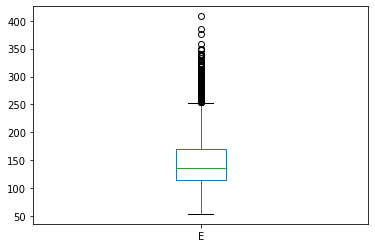

In [107]:
Tdf.E.plot(kind = 'box')

In [108]:
### I am going to get rid of the outliers, so I will remove seasons with more than 225 errors.

In [109]:
Tdf = Tdf[Tdf.E < 225]

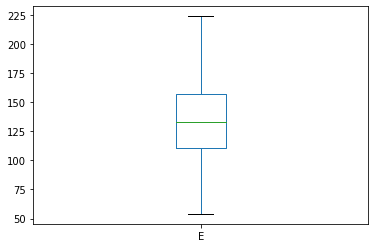

In [110]:
Tdf.E.plot(kind = 'box')

In [111]:
Tdf.to_csv("../data/Clean_Teams_Data.csv")